In [11]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

dash = pd.read_csv('/home/ml/datasets/DASH60_with_indicators.csv',delimiter=',')
dash.head()

,Date_Time,Open,Max,Min,Close,Volume,SMA14,SMA30,EMA14,EMA30,...,BB_Mean,BB_Upper,EMA_12,EMA_26,MACD,RSI,ATR,PSAR,Pct_Change,Direction
0,2017-09-08 14:00:00,335.93,335.93,293.66,322.16,274,329.045000,329.045000,328.553214,328.815500,...,329.045000,556.947644,328.471250,328.780192,-0.308942,11.046512,41.508571,362.790000,-0.040991,-1.0
1,2017-09-08 15:00:00,322.16,326.39,307.20,323.87,241,327.320000,327.320000,326.764211,327.055920,...,327.320000,502.991247,326.675381,327.016008,-0.340627,40.078329,34.885178,362.790000,0.005308,1.0
2,2017-09-08 16:00:00,324.00,335.90,324.00,331.37,137,328.332500,328.332500,328.173251,328.244606,...,328.332500,479.395780,328.157289,328.233194,-0.075905,27.394408,28.853749,360.024800,0.023157,1.0
3,2017-09-08 17:00:00,331.37,331.54,320.73,320.73,121,326.812000,326.812000,326.231319,326.534851,...,326.812000,479.939402,326.139321,326.493172,-0.353851,26.812227,24.336618,357.370208,-0.032109,-1.0
4,2017-09-08 18:00:00,320.73,326.43,320.00,320.00,77,325.676667,325.676667,324.789503,325.256411,...,325.676667,477.319026,324.647143,325.192642,-0.545499,25.456053,20.616776,354.821800,-0.002276,-1.0


In [12]:
dash.columns

Index(['Date_Time', 'Open', 'Max', 'Min', 'Close', 'Volume', 'SMA14', 'SMA30',
       'EMA14', 'EMA30', 'Privot_Dot', 'Diff', 'TR', 'R1', 'R2', 'R3', 'S1',
       'S2', 'S3', 'BB_Lower', 'BB_Mean', 'BB_Upper', 'EMA_12', 'EMA_26',
       'MACD', 'RSI', 'ATR', 'PSAR', 'Pct_Change', 'Direction'],
      dtype='object')

In [13]:
n_train = (dash['Date_Time'].count()*0.7).astype(int)

X = dash[['SMA14', 'SMA30',
       'EMA14', 'EMA30', 'Privot_Dot', 'TR', 'R1', 'R2', 'R3', 'S1',
       'S2', 'S3', 'BB_Lower', 'BB_Mean', 'BB_Upper', 'EMA_12', 'EMA_26',
       'MACD', 'RSI', 'ATR', 'PSAR']]

y = dash['Diff']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

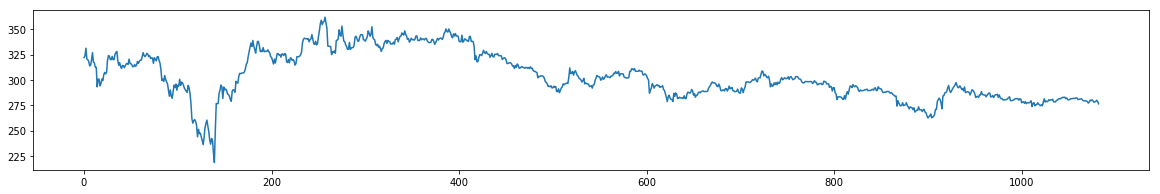

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(dash.index, dash['Close'] , label="Close")

In [15]:
def plot_residuen(model):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Trainingsdaten')
    plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Testdaten')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')
    plt.hlines(y=0, xmin=-10, xmax=10, lw=2, color='red')

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def print_scores(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('MSE-Training: %.3f, Test: %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
    print('R^2-Training: %.3f, Test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [18]:
print_scores(forest)

MSE-Training: 1.739, Test: 4.343
R^2-Training: 0.880, Test: -0.051


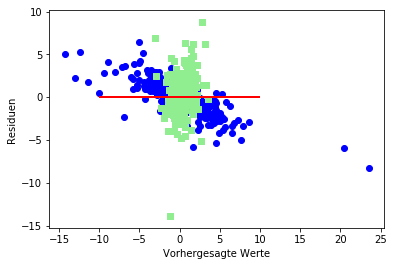

In [19]:
plot_residuen(forest)